# <center>MACHINE LEARNING ASSIGMENT </center>
##### <center>STUDENT NAME : ARUL RAYMONDS GEORGE JOSEPH</center>
##### <center>STUDENT ID: C00278718</center>

## Table of Contents:
1. [Introduction](#first-bullet)
2. [Businiess Understanding](#second-bullet)
3. [Data Understanding](#third-bullet)
4. [Data Preparation](#fourth-bullet)
5. [Modelling](#fifth-bullet)
6. [Evaluation](#sixth-bullet)
7. [Deployments](#seventh-bullet)
8. [Discussion](#eighth-bullet)
9. [Results](#nineth-bullet)
10. [References](#tenth-bullet)


## 1. Introduction <a class="anchor" id="first-bullet"></a>

World % of the protien intake comes from seafoods by fishing industry globally. Additionally, the demand for seafood is increasing due to economic availablity in developing nations and consumption of exotic fishes in developed countires are at rise. Also, fishing industry genrate employment for millons of people. So the pressure on fishing industry is increasing that leads to overfishing, poaching, human rights abuse and other illegal activites. Furthermore, overfishing greatly contributes to the reducing fish stocks of many fish species due its demand and rarity. So, many govermnets and non profit organisations like Global Fishing Watch (GFW) , google, skytruth and Spire are creating tools to actively monitor fishing activities that generates public awareness and helps policy makers to take actions against illegal activites. 
<br>
In this project we will try to understand and predict fishing vessels involed in fishing across globe by using ananymized open source data provided by GFW. The data

## 2. Business Understanding <a class="anchor" id="second-bullet"></a>

code blocks...

## 3. Data understanding <a class="anchor" id="third-bullet"></a>

code blocks...

## 4. Data Preparation <a class="anchor" id="fourth-bullet"></a>

code blocks...`

## 5. Modelling <a class="anchor" id="fifth-bullet"></a>

code blocks...

In [1]:

import tensorflow as tf
import pandas as pd
import numpy as np
import itertools


print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")


GPU is available


### Load Data from datapath

In [115]:
datapath = "data/0dab1200-c004-11ec-8a45-f167084fd93d/"
purse_seines = "purse_seines.csv"
unknown = "unknown.csv"
trollers = "trollers.csv"
trawlers = "trawlers.csv"
pole_and_line = "pole_and_line.csv"
fixed_gear = "fixed_gear.csv"
drifting_longlines = "drifting_longlines.csv"

pd.set_option('display.float_format', lambda x: '%0.4f' % x)
df = pd.read_csv(datapath+trawlers)
copy = df.copy()
# create new column for datetime for convinence
df["datetime"] = pd.to_datetime(df['timestamp'],unit='s')
df = df.drop_duplicates()
df.head()

mmsi       timestamp  distance_from_shore  distance_from_port  \
0 1252339803566.0000 1325376038.0000               0.0000              0.0000   
1 1252339803566.0000 1325377993.0000               0.0000              0.0000   
2 1252339803566.0000 1325378594.0000               0.0000              0.0000   
3 1252339803566.0000 1325379595.0000               0.0000              0.0000   
4 1252339803566.0000 1325380560.0000               0.0000              0.0000   

   speed   course     lat    lon  is_fishing source            datetime  
0 0.0000 153.0000 52.4586 4.5812     -1.0000    gfw 2012-01-01 00:00:38  
1 0.0000 153.0000 52.4587 4.5812     -1.0000    gfw 2012-01-01 00:33:13  
2 0.0000 153.0000 52.4586 4.5812     -1.0000    gfw 2012-01-01 00:43:14  
3 0.0000 153.0000 52.4586 4.5812     -1.0000    gfw 2012-01-01 00:59:55  
4 0.0000 153.0000 52.4586 4.5812     -1.0000    gfw 2012-01-01 01:16:00

### Analysing is_fishing atrribute
is_fishing = -1; not available <br>
is_fishing = 0; not fishing <br>
is_fishing > 0; possiblithy of fishing activity <br> <br>
Lets find out how many values of is_fihing is captured

In [116]:
df["is_fishing"].unique()

array([-1.        ,  0.        ,  1.        ,  0.6666667 ,  0.33333334,
        0.75      ,  0.25      ])

In [117]:
df[df["is_fishing"]>0].size

708345

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4369101 entries, 0 to 4369100
Data columns (total 11 columns):
 #   Column               Dtype         
---  ------               -----         
 0   mmsi                 float64       
 1   timestamp            float64       
 2   distance_from_shore  float64       
 3   distance_from_port   float64       
 4   speed                float64       
 5   course               float64       
 6   lat                  float64       
 7   lon                  float64       
 8   is_fishing           float64       
 9   source               object        
 10  datetime             datetime64[ns]
dtypes: datetime64[ns](1), float64(9), object(1)
memory usage: 400.0+ MB


In [119]:
df.describe().apply(lambda s: s.apply('{0:.5f}'.format))

mmsi         timestamp distance_from_shore  \
count          4369101.00000     4369101.00000       4369101.00000   
mean   157895239544453.53125  1426219858.15639         78198.02489   
std     94947789560500.62500    38764722.50157        204074.69896   
min      1252339803566.00000  1325376038.00000             0.00000   
25%     77261928739173.00000  1397205111.00000             0.00000   
50%    175387414441613.00000  1434811196.00000          4242.53662   
75%    240226012373593.00000  1458922432.00000         55783.93359   
max    277515277585463.00000  1480031962.00000       3257453.25000   

      distance_from_port          speed         course            lat  \
count      4369101.00000  4369023.00000  4369023.00000  4369101.00000   
mean        149664.80424        2.97240      174.40434       32.66757   
std         327953.23712        4.10508      115.47010       38.37240   
min              0.00000        0.00000        0.00000      -84.98024   
25%           2236.01318        0.00000       64.80000       36.23107   
50%          36054.62500        1.50000      187.00000       52.09994   
75%          96080.93750        4.50000      276.00000       54.63578   
max       12452204.00000      102.30000      511.00000       84.61642   

                 lon     is_fishing  
count  4369101.00000  4369101.00000  
mean         4.92777       -0.94491  
std         81.27552        0.28445  
min       -179.99963       -1.00000  
25%         -8.28853       -1.00000  
50%          4.58442       -1.00000  
75%         14.32063       -1.00000  
max        179.99338        1.00000

In [120]:
df = df.dropna()
df = df[df["is_fishing"] != -1]
df["year"] = df["datetime"].dt.year
df["month"] = df["datetime"].dt.month
df["hour"] = df["datetime"].dt.hour
df["day"] = df["datetime"].dt.day
df = df[df["mmsi"] != 186746307373264.0000]
df.drop(['distance_from_shore','timestamp'], axis=1, inplace=True)

In [121]:
df.describe().apply(lambda s: s.apply('{0:.5f}'.format))

mmsi distance_from_port         speed        course  \
count           175320.00000       175320.00000  175320.00000  175320.00000   
mean   192290061414991.65625       276584.63947       2.93091     182.69206   
std     87235131846054.20312       479682.05267       3.82241     114.51205   
min      1252339803566.00000            0.00000       0.00000       0.00000   
25%    121426486551523.00000         2236.01318       0.00000      76.60000   
50%    222656062190286.00000        52998.69922       1.20000     197.20000   
75%    269050323939773.00000       250969.93750       4.20000     280.79999   
max    277515277585463.00000      3836963.25000     102.30000     360.00000   

                lat           lon    is_fishing          year         month  \
count  175320.00000  175320.00000  175320.00000  175320.00000  175320.00000   
mean       44.76778      -2.79118       0.35105    2014.55112       6.31525   
std        33.03098      42.58884       0.47472       0.83047       3.88738   
min       -50.19218    -179.69106       0.00000    2012.00000       1.00000   
25%        43.61536      -8.69353       0.00000    2014.00000       2.00000   
50%        54.63050       5.18031       0.00000    2015.00000       7.00000   
75%        64.15637      16.54748       1.00000    2015.00000       9.00000   
max        78.92516     179.69962       1.00000    2016.00000      12.00000   

               hour           day  
count  175320.00000  175320.00000  
mean       11.91319      15.81496  
std         6.76303       8.69971  
min         0.00000       1.00000  
25%         6.00000       8.00000  
50%        12.00000      16.00000  
75%        18.00000      23.00000  
max        23.00000      31.00000

In [122]:
from collections import Counter
c = Counter(df["speed"])
count = c.most_common()
s = [x for x in count]
s.sort()


In [123]:
df.head()

mmsi  distance_from_port  speed   course     lat    lon  \
60646 1252339803566.0000              0.0000 0.0000 128.0000 52.4587 4.5813   
60647 1252339803566.0000              0.0000 0.0000 128.0000 52.4587 4.5813   
60648 1252339803566.0000              0.0000 0.0000 128.0000 52.4587 4.5813   
60649 1252339803566.0000              0.0000 0.0000 128.0000 52.4587 4.5812   
60650 1252339803566.0000              0.0000 0.0000 128.0000 52.4587 4.5812   

       is_fishing source            datetime  year  month  hour  day  
60646      0.0000    gfw 2015-01-01 05:08:23  2015      1     5    1  
60647      0.0000    gfw 2015-01-01 05:20:34  2015      1     5    1  
60648      0.0000    gfw 2015-01-01 05:32:53  2015      1     5    1  
60649      0.0000    gfw 2015-01-01 05:45:23  2015      1     5    1  
60650      0.0000    gfw 2015-01-01 05:57:24  2015      1     5    1

Find the fishing vessels by using is_fishing > 0 and find the number of enter for each vessel

In [133]:
fishing_vessels = df[df["is_fishing"]>=0]
unique_mmsi = fishing_vessels["mmsi"].unique()
fishing_vessels.to_csv(datapath+"doi.csv")
fishing_vessels.shape

(175320, 13)

In [134]:
pd.set_option("max_rows", None)
# group = fishing_vessels[fishing_vessels["mmsi"]==34911701098431].groupby('datetime')
# fishing_location = fishing_vessels[fishing_vessels["mmsi"]==34911701098431].sort_values(by="datetime")
fishing_location = fishing_vessels.sort_values(by=["datetime"])

# fishing_location.size
#pd.reset_option(“max_rows”)

In [135]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [6, 2]

# for column in df.columns:
#     plt.figure()             # <==================== here!
#     sns.displot(df[column])

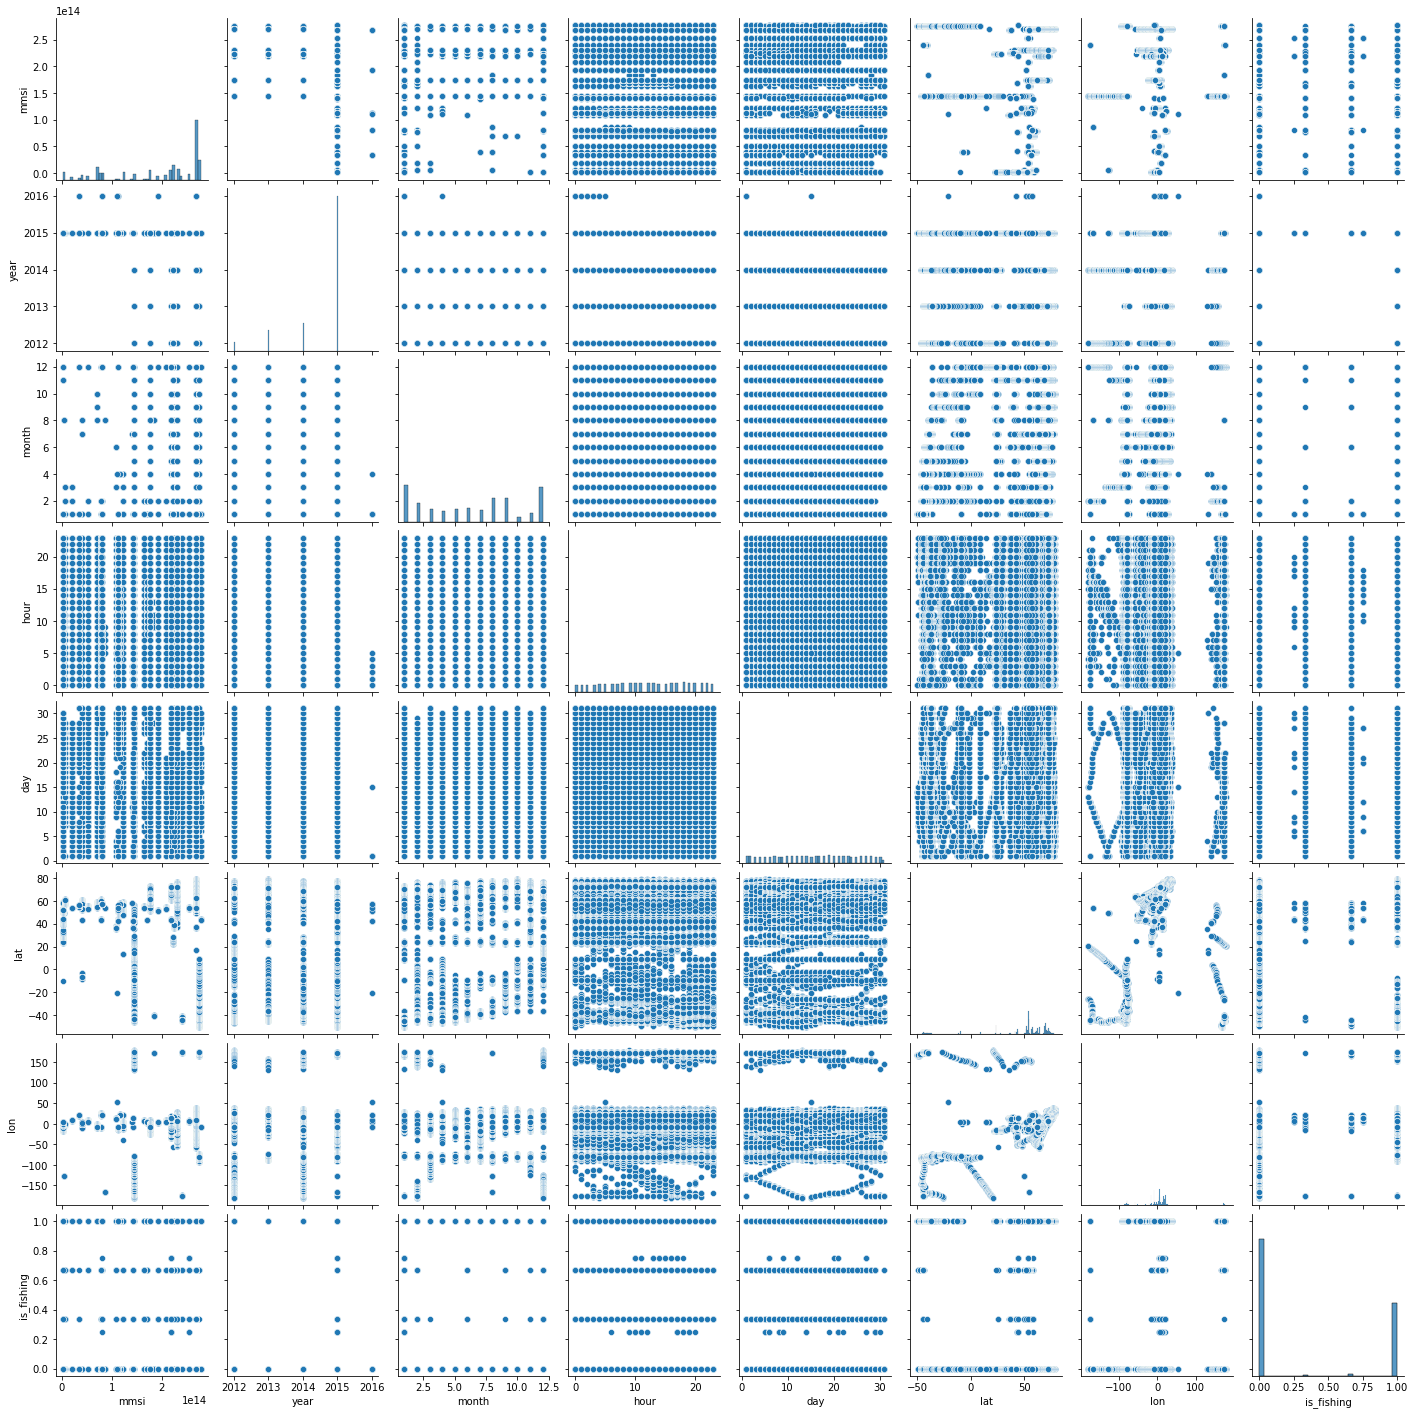

In [136]:


#sns.pairplot(fishing_location.loc[:,~df.isin(["mmsi","year","month","hour","day","lat","lon"])], height=2.5);
g = sns.pairplot(fishing_location, vars=["mmsi","year","month","hour","day","lat","lon","is_fishing"])



In [108]:
import plotly.express as px
dat = df[:100000000:1000]

fishing_location["mmsi"] = fishing_location["mmsi"].astype(str)
fig = px.line_geo(fishing_vessels,lat='lat',lon='lon', color = "mmsi", hover_name="datetime",projection ="azimuthal equal area")#, \
#animation_frame = fishing_location["datetime"][:500].astype(str))
fig.update_layout(title = 'World map', title_x=0.5)
fig.show()

## 6. Evaluation <a class="anchor" id="sixth-bullet"></a>

code blocks...

## 7. Deployments <a class="anchor" id="seventh-bullet"></a>

code blocks...

## 8. Discussion <a class="anchor" id="eighth-bullet"></a>

code blocks...

## 9. Result <a class="anchor" id="nineth-bullet"></a>

code blocks...

## 9. References <a class="anchor" id="tenth-bullet"></a>

code blocks...